In [1]:
import pandas as pd

# Load the CSV
df = pd.read_csv("glassdoor_cleaned.csv")



In [2]:
df

,Job Title,Location,Rating,monthly,min_salary_rupees,max_salary_rupees,avg_salary_rupees,company_name_cleaned
0,Data Scientist,Bhubaneshwar,4.3,0,1000000,2300000,1650000.0,Nirmalya Labs
1,Data Analytics Lead Analyst - C13 - BANGALORE,Bengaluru,3.7,0,600000,1000000,800000.0,Citi
2,Business Analyst – Digital Analytics ( Adobe ),Bengaluru,3.7,0,500000,1000000,750000.0,Citi
3,"Sr. Consultant, Data Science and Analytics",Bengaluru,4.0,0,1000000,1000000,1000000.0,TransUnion
4,Lead Data Analytics Analyst (Vice President),Bengaluru,3.7,0,600000,1000000,800000.0,Citi
...,...,...,...,...,...,...,...,...
333,Data Scientist & Gen AI Consultant(BTP D@S),Gurgaon,1.0,0,500000,800000,650000.0,SAP Group
334,Decision Scientist - Associate,Mumbai,3.8,0,300000,800000,550000.0,FedEx AMEA
335,Data Scientist,Gurgaon,3.1,0,200000,800000,500000.0,Circle K
336,CFL Data Scientist,Bengaluru,4.0,0,400000,1000000,700000.0,SUSE


In [3]:
df.shape

(338, 8)

In [19]:
df.describe()

,Rating,monthly,min_salary_rupees,max_salary_rupees,avg_salary_rupees
count,324.000000,338.00000,3.380000e+02,3.380000e+02,3.380000e+02
mean,3.874074,0.06213,4.983373e+05,7.770266e+05,6.376820e+05
std,0.394397,0.24175,5.912209e+05,5.283552e+05,4.822912e+05
min,1.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.700000,0.00000,3.000000e+05,6.000000e+05,4.500000e+05
50%,3.900000,0.00000,4.000000e+05,8.000000e+05,6.000000e+05
75%,4.100000,0.00000,6.000000e+05,1.000000e+06,7.500000e+05
max,5.000000,1.00000,9.000000e+06,6.000000e+06,4.850000e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Job Title             338 non-null    object 
 1   Location              323 non-null    object 
 2   Rating                324 non-null    float64
 3   monthly               338 non-null    int64  
 4   min_salary_rupees     338 non-null    int64  
 5   max_salary_rupees     338 non-null    int64  
 6   avg_salary_rupees     338 non-null    float64
 7   company_name_cleaned  338 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 21.3+ KB


In [6]:
# Get unique job titles (remove NaN, strip whitespaces)
unique_titles = df['Job Title'].dropna().str.strip().unique()

# Convert to a sorted list
unique_titles = sorted(unique_titles)

# Display them
for title in unique_titles:
    print(title)


(Remote, India) Sr. Data Scientist, Analytics R&D
AI & ML Engineer
AI - Senior Staff Engineer
AI Architect/Lead
AI Data Engineer
AI Data Scientist - Digital Engineering Sr. Engineer
AI Developer
AI Engineer
AI Lead
AI ML Engineer
AI Operations and Optimization Manager
AI Product Owner
AI Research Engineer (Model Evaluation)
AI or ML Engineer
AI/ML - Jr & Sr Positions
AI/ML Associate Engineer
AI/ML Data Scientist
AI/ML Developer
AI/ML Engineer
AI/ML Engineer (Python Developer)
AI/ML Engineer - 5 to 10 yrs
AI/ML Engineer – Team Lead
AI/ML Expert
AI/ML Operations Lead
AIML - Data Scientist - Hyderabad
APPLIED AI SCIENTIST
ASSOCIATE DATA SCIENTIST
Analyst, DACI Analytics
Analytics Solutions - Vice President
Application Support Group Manager - Big Data Platform - SVP
Applied Scientist I, Geospatial Science, Last Mile
Applied Scientist II, India Machine Learning
Assistant Manager - Data Science
Associate - Analytics Solutions
Associate - Data, Insights & Analytics
Associate Architect - Machi

In [7]:
def map_job_title(title):
    title = title.lower()

    if any(x in title for x in ['data scientist', 'decision scientist', 'applied scientist', 'statistical data']):
        return 'Data Scientist'
    elif any(x in title for x in ['ml engineer', 'machine learning engineer', 'ml developer']):
        return 'ML Engineer'
    elif any(x in title for x in ['ai', 'artificial intelligence']):
        return 'AI Engineer'
    elif any(x in title for x in ['data analyst', 'business analyst', 'bi analyst', 'marketing analyst']):
        return 'Data Analyst'
    elif 'engineer' in title and 'data' in title:
        return 'Data Engineer'
    elif any(x in title for x in ['manager', 'director', 'vp', 'lead', 'head']):
        return 'Manager/Director'
    elif any(x in title for x in ['trainer', 'faculty', 'mentor', 'tutor']):
        return 'Trainer/Faculty'
    elif any(x in title for x in ['intern', 'trainee', 'junior', 'associate']):
        return 'Intern/Associate'
    elif any(x in title for x in ['product manager', 'program manager', 'project manager']):
        return 'Product/Program Manager'
    else:
        return 'Other'

# Apply to DataFrame
df['Standardized Title'] = df['Job Title'].apply(map_job_title)

# View result
df['Standardized Title'].value_counts()


Standardized Title
Data Scientist      129
AI Engineer          64
ML Engineer          51
Other                36
Manager/Director     34
Data Engineer         8
Intern/Associate      8
Data Analyst          5
Trainer/Faculty       3
Name: count, dtype: int64

In [8]:
missing = df.isnull().sum()
print(missing[missing > 0])


Location    15
Rating      14
dtype: int64


In [9]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [10]:
print(df['Location'].value_counts().head(10))

Location
Bengaluru    131
Hyderābād     40
Pune          25
Chennai       23
Gurgaon       21
Noida         19
Mumbai        16
India         10
Remote         7
Cochin         5
Name: count, dtype: int64


In [11]:
print(df['company_name_cleaned'].value_counts().head(10))

company_name_cleaned
EY                   10
JPMorganChase         9
Citigroup             6
Optum                 5
Google                5
Thomson Reuters       5
Commonwealth Bank     4
Target                4
ADCI - Karnataka      4
Apple                 4
Name: count, dtype: int64


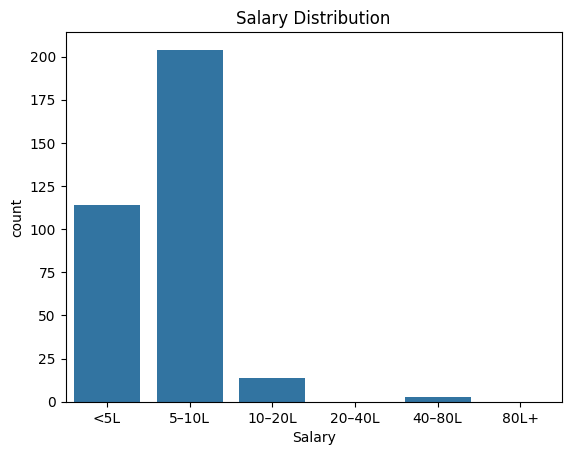

In [17]:
bins = [0, 500000, 1000000, 2000000, 4000000, 8000000, 20000000]
labels = ['<5L', '5–10L', '10–20L', '20–40L', '40–80L', '80L+']
df['Salary'] = pd.cut(df['avg_salary_rupees'], bins=bins, labels=labels)

sns.countplot(x='Salary', data=df, order=labels)
plt.title("Salary Distribution")
plt.show()


Text(0.5, 1.0, 'Salary Distribution by Job Role')

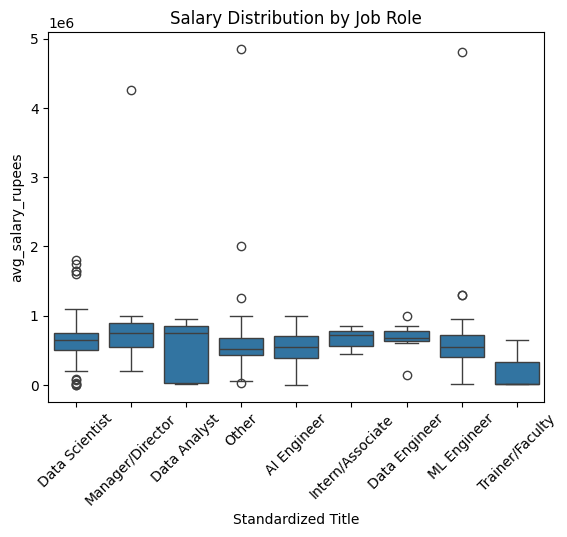

In [18]:
sns.boxplot(x='Standardized Title', y='avg_salary_rupees', data=df)
plt.xticks(rotation=45)
plt.title("Salary Distribution by Job Role")


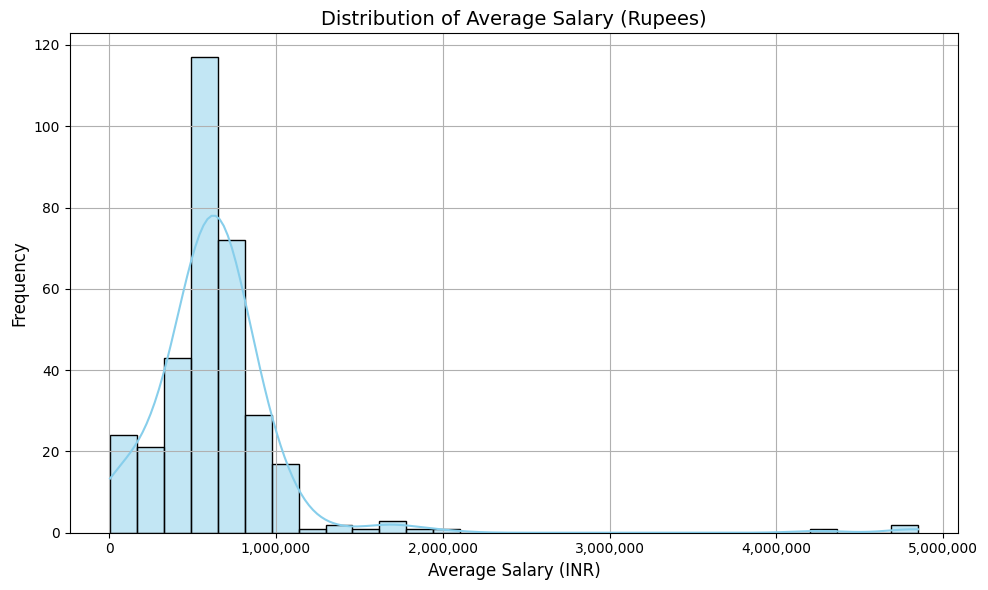

In [21]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10, 6))
sns.histplot(df_valid['avg_salary_rupees'], bins=30, kde=True, color='skyblue')

plt.title("Distribution of Average Salary (Rupees)", fontsize=14)
plt.xlabel("Average Salary (INR)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

formatter = mtick.FuncFormatter(lambda x, _: f"{int(x):,}")
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(True)
plt.tight_layout()
plt.show()


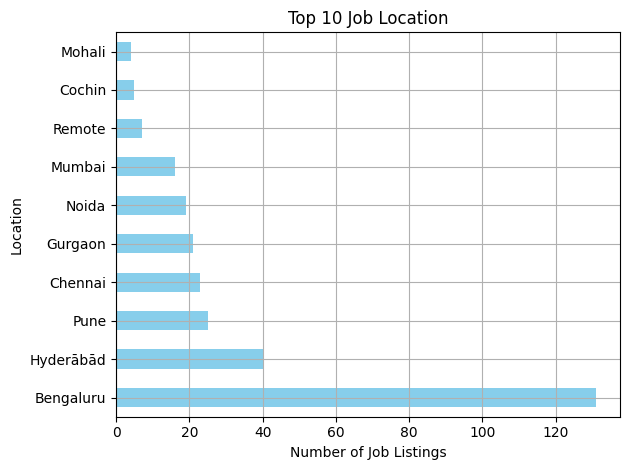

In [23]:

filtered_df = df[df['Location'].str.strip().str.lower() != 'india']


top_locs = filtered_df['Location'].value_counts().head(10)

top_locs.plot(kind='barh', color='skyblue')
plt.title("Top 10 Job Location")
plt.xlabel("Number of Job Listings")
plt.ylabel("Location")
plt.grid(True)
plt.tight_layout()
plt.show()
